In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import integrate

Tiempo: 0.0
Nº Debajo: 544
Nº Total: 1000
(b-a)M = 2.0
Area Vector: 1.088

Area con scipy: 1.0
Error: 0.08800000000000008


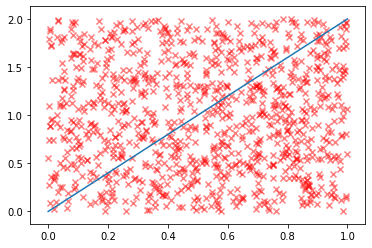

In [2]:

def f(x):
    return 2*x #y = -x^2+3x

def nep(x):
    return (x**12*np.exp(x))/(x+1*x+40)
    
def plot_func(fun,a,b):
    x = np.linspace(a,b,50)
    for i,v in enumerate(x):
        y = fun(x)
        
    plt.plot(x,y)

    

def integra_mc(fun, a, b, num_puntos=10000, print_out=True):
    VAL = 1000
    x = np.linspace(a,b,VAL)
    y = np.array(fun(x))

    x_rand = np.random.uniform(a,b,num_puntos)
    y_rand = np.random.uniform(min(y),max(y),num_puntos)
    
    tic = time.process_time()
    debajo = 0
    for i in range(num_puntos):
        if y_rand[i] < fun(x_rand[i]):
            debajo += 1
    toc = time.process_time()
    if print_out:
        print("Tiempo: {}".format(1000*(toc-tic)))
        print("Nº Debajo: {}".format(debajo))
        print("Nº Total: {}".format(num_puntos))
        print("(b-a)M = {}".format((b-a)*max(y)))
        print("Area Vector: {}".format((debajo/num_puntos)*(b-a)*max(y)))
        plt.scatter(x_rand,y_rand,c='red',marker='x', alpha=0.5)
    return (debajo/num_puntos)*(b-a)*max(y)
def integra_mc_bucle(fun, a, b, num_puntos=10000):
    VAL = 1000
    x = np.linspace(a,b,VAL)
    y = np.array(fun(x))

   
    tic = time.process_time()
    debajo = 0
    for i in range(num_puntos):
        x_rand = np.random.uniform(a,b)
        y_rand = np.random.uniform(min(y),max(y))
        if y_rand < fun(x_rand):
            debajo += 1
    toc = time.process_time()
    print("Tiempo: {}".format(1000*(toc-tic)))
    print("Nº Debajo: {}".format(debajo))
    print("Nº Total: {}".format(num_puntos))
    print("(b-a)M = {}".format((b-a)*max(y)))
    print("Area Bucle: {}".format((debajo/num_puntos)*(b-a)*max(y)))    
    print("----------------")
    return (1000*(toc-tic))

divby = 10**13

func = f
a = 0
b = 1
puntos = 1000
plot_func(func,a,b)
#integra_mc_bucle(f,a,b)
mc_area = integra_mc(func,a,b,num_puntos=puntos)
print("\nArea con scipy: {}".format(integrate.quad(func,a,b)[0]))
print("Error: {}".format(abs(mc_area - integrate.quad(func,a,b)[0])))
plt.show()


In [3]:

def f(x):
    return 2*x #y = -x^2+3x
        
def plot_func(fun,a,b):
    x = np.linspace(a,b,50)
    for i,v in enumerate(x):
        y = fun(x)
        
    plt.plot(x,y)

    

def integra_mc_time(fun, a, b, num_puntos=10000):
    VAL = 1000
    x = np.linspace(a,b,VAL)
    y = np.array(fun(x))

    x_rand = np.random.uniform(a,b,num_puntos)
    y_rand = np.random.uniform(min(y),max(y),num_puntos)
    
    tic = time.process_time()
    debajo = 0
    for i in range(num_puntos):
        if y_rand[i] < fun(x_rand[i]):
            debajo += 1
    toc = time.process_time()
    return (1000*(toc-tic))
    
def integra_mc_bucle_time(fun, a, b, num_puntos=10000):
    VAL = 100
    x = np.linspace(a,b,VAL)
    y = np.array(fun(x))

   
    tic = time.process_time()
    debajo = 0
    for i in range(num_puntos):
        x_rand = np.random.uniform(a,b)
        y_rand = np.random.uniform(min(y),max(y))
        if y_rand < fun(x_rand):
            debajo += 1
    toc = time.process_time()    
    return (1000*(toc-tic))


def compara_tiempos(fun,a,b):
    sizes = np.linspace(100,1000,20)
    times_bucle = []
    times_fast = []
    for size in sizes:
        times_bucle += [integra_mc_bucle_time(fun,a,b,int(size))]
        times_fast += [integra_mc_time(fun,a,b,int(size))]
        
    plt.figure()
    plt.scatter(sizes,times_bucle, c='red', label='bucle')
    plt.scatter(sizes, times_fast, c='blue', label='vector')
    plt.legend()
    plt.show()
        

a = 0
b = 10


#plot_func(f,a,b)
#integra_mc_bucle(f,a,b)
#integra_mc(f,a,b)
#plt.show()

compara_tiempos(f,a,b)

KeyboardInterrupt: 